# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using "Mouse ID" as the common column
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Reorder the columns to match your desired format
combined_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                               "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

# Display the data table for preview
combined_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [5]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Checking for duplicate rows based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate entries
print("Duplicate entries based on Mouse ID and Timepoint:")
duplicate_mice

Duplicate entries based on Mouse ID and Timepoint:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID.

# Get all the Mouse IDs that have duplicates based on Mouse ID and Timepoint
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# Retrieve all the data for these duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
print("All data for the duplicate Mouse IDs:")
duplicate_mouse_data

All data for the duplicate Mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Drop all data for the duplicate Mouse ID(s)
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the cleaned data
print("Cleaned data after removing duplicates based on Mouse ID:")
cleaned_data.head()

Cleaned data after removing duplicates based on Mouse ID:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [9]:
# Checking the number of unique mice in the cleaned data
number_of_mice_cleaned = cleaned_data["Mouse ID"].nunique()

# Display the number of unique mice in the cleaned DataFrame
print(f"Number of unique mice in the cleaned data: {number_of_mice_cleaned}")

Number of unique mice in the cleaned data: 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Grouping the data by Drug Regimen and applying statistical methods to calculate mean, median, variance, std dev, and SEM
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Std_Dev="std",
    Tumor_Volume_Std_Err="sem"
).reset_index()

# Displaying the summary statistics
summary_statistics

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

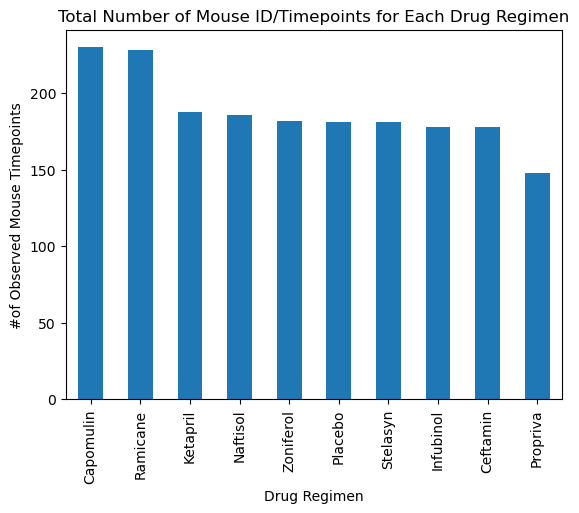

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Count the number of rows for each drug regimen
row_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using pandas
row_counts.plot(kind="bar", title="Total Number of Mouse ID/Timepoints for Each Drug Regimen", xlabel="Drug Regimen", ylabel="#of Observed Mouse Timepoints")

# Display the plot
plt.show()

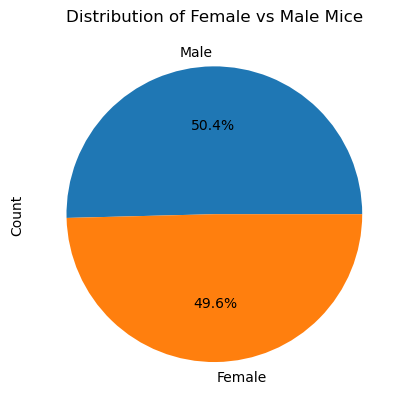

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[["Mouse ID", "Sex"]].drop_duplicates()

# Count the distribution of female and male mice
gender_counts = unique_mice_gender["Sex"].value_counts()

# Create a pie chart using pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Female vs Male Mice", ylabel="Count")

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Filter the data for the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the final tumor volume data
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Loop through each treatment to calculate the IQR and determine outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the quartiles and IQR for tumor volume
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine the lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine if there are any potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results for this treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\nedaj\AppData\Local\Temp\ipykernel_18492\3160666222.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)


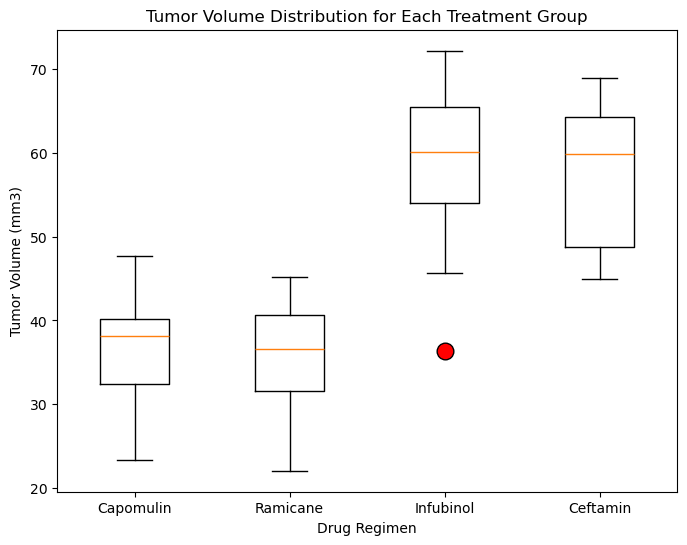

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create a list of tumor volume data for each treatment
tumor_vol_data = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments]

# Customize the appearance of outliers with red circles
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

# Add title and labels
plt.title("Tumor Volume Distribution for Each Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Display the plot
plt.show()

## Line and Scatter Plots

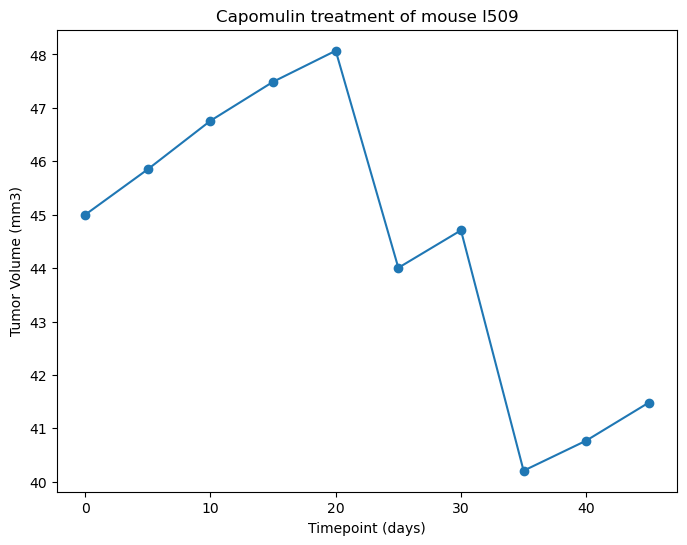

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a srequested mouse (e.g., 'l509')
mouse_id = 'l509'

# Filter the data for this mouse
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')

# Add labels and title
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

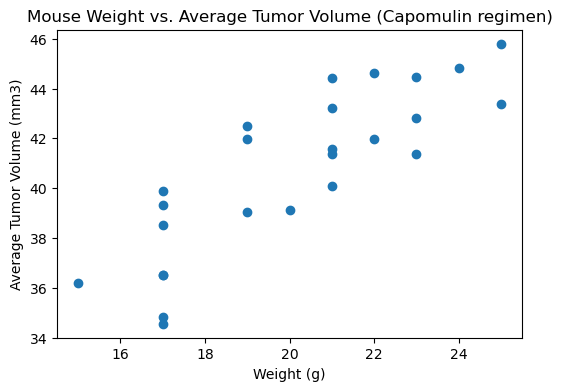

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 4))
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"], marker='o')

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

## Correlation and Regression

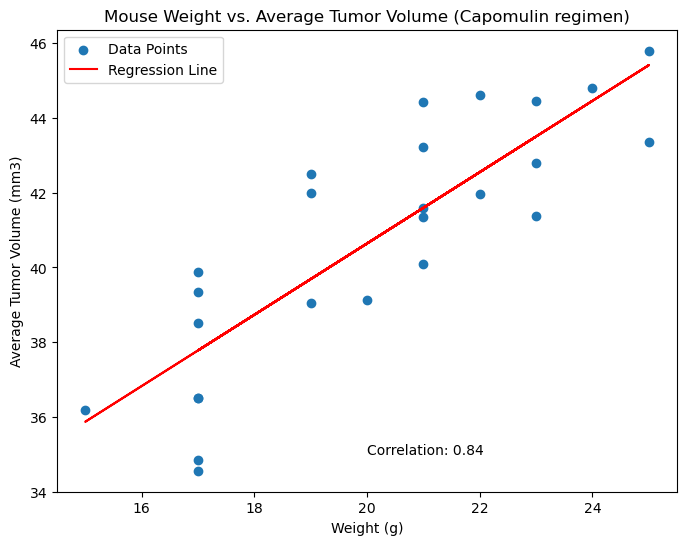

(0.8419363424694722,
 0.9544396890241048,
 21.552160532685008,
 0.8419363424694721,
 1.3225722434712404e-07,
 0.12754359033201323)

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import linregress from scipy for linear regression calculation
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression for mouse weight vs. average tumor volume

# Get the values of mouse weight and average tumor volume
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation = x_values.corr(y_values)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Generate regression line values
regress_values = slope * x_values + intercept

# Create scatter plot and plot the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the correlation coefficient on the plot
plt.annotate(f"Correlation: {correlation:.2f}", (20, 35))

# Display the plot
plt.legend()
plt.show()

# Print the results of the linear regression
correlation, slope, intercept, rvalue, pvalue, stderr